# Shafiqul Alam Khan

# EE 5323 Digital Image Processing

# Homework #3

# Due date: 2/16/2023

## 1. Download the image “cell20004.jpg.” Design an image process to clearly show the buttons, numbers, and background as the original image below.

In [1]:
# Importing libraries
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps    
import argparse
import math

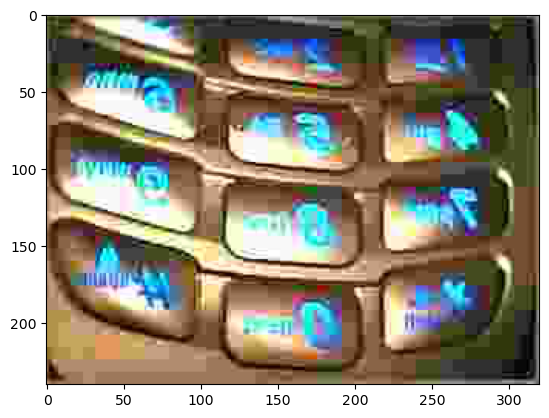

In [2]:
# Importing "cell020004.jpg" image
image = Image.open('cell020004.jpg')

# Printing imported image
plt.imshow(image)
plt.show()

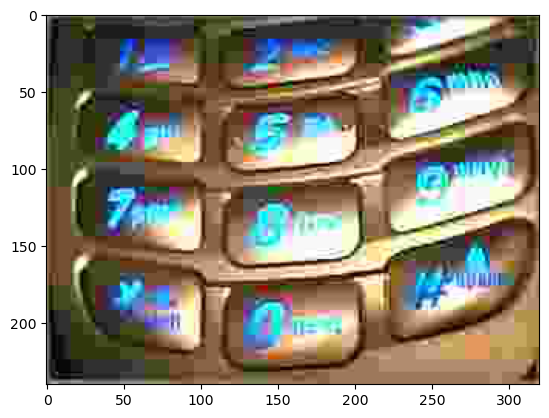

In [3]:
# Rotating the image 
rotated_image = image.transpose(Image.Transpose.FLIP_LEFT_RIGHT)

# Printing rotated image
plt.imshow(rotated_image)
plt.show()
rotated_image.save("rotated_image.png")

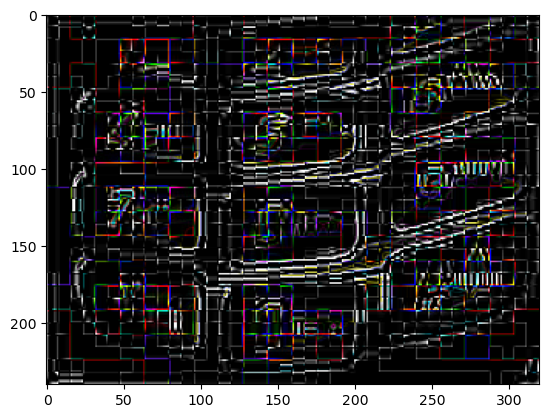

In [4]:
# Sharpening rotated image
img = cv2.imread("rotated_image.png", 1)
kernel = np.array([[-1, -1, -1],
                 [-1, 8, -1],
                 [-1, -1, -1]])
im = cv2.filter2D(img, -1, kernel)

# Showing sharpened image
plt.imshow(im)
plt.show()

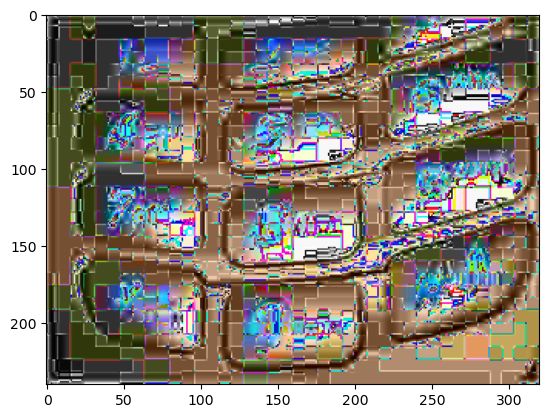

In [5]:
# adding images
add_1 = im + rotated_image
plt.imshow(add_1)
plt.show()

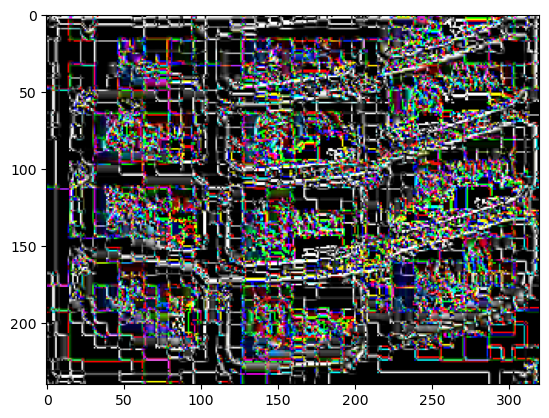

In [6]:
# Prewitt filtering
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img_prewittx = cv2.filter2D(add_1, -1, kernelx)
img_prewitty = cv2.filter2D(add_1, -1, kernely)

img_prewitt = img_prewittx + img_prewitty

# Showing prewitt filtered image
plt.imshow(img_prewitt)
plt.show()

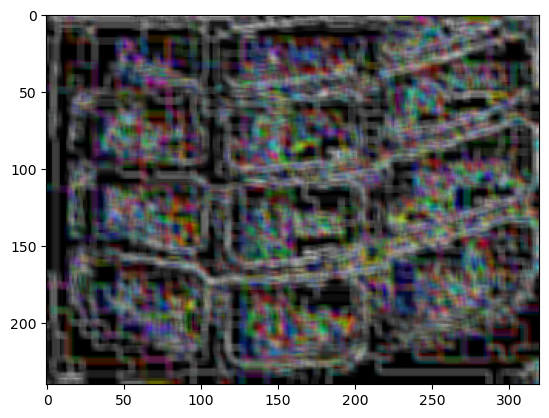

In [7]:
# Adding ones to image
kernel = np.ones((5,5))/25
add_2 = cv2.filter2D(img_prewitt, -1, kernel)

# Showing added image
plt.imshow(add_2)
plt.show()

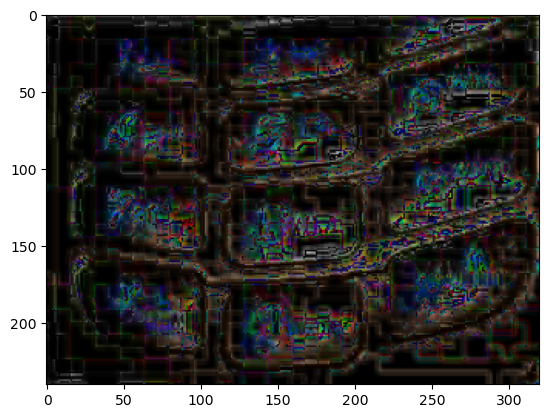

In [8]:
# Multipling images
mul_1 = np.double(add_1)/255
mul_2 = np.double(add_2)/255
mul_3 = np.array((mul_1*mul_2)*255, dtype = 'uint8')

# Showing resulting image
plt.imshow(mul_3)
plt.show()

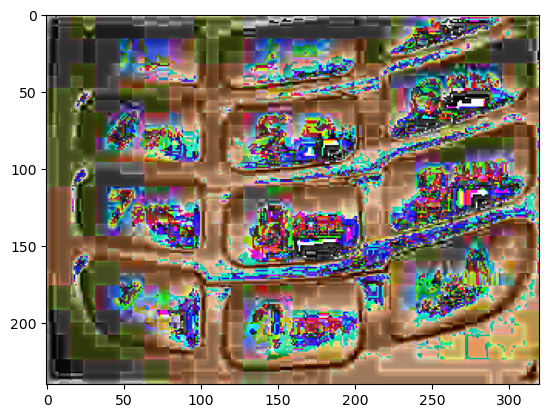

In [9]:
# Adding rotated image and multiplied image
add_3 = rotated_image + mul_3
plt.imshow(add_3)
plt.show()

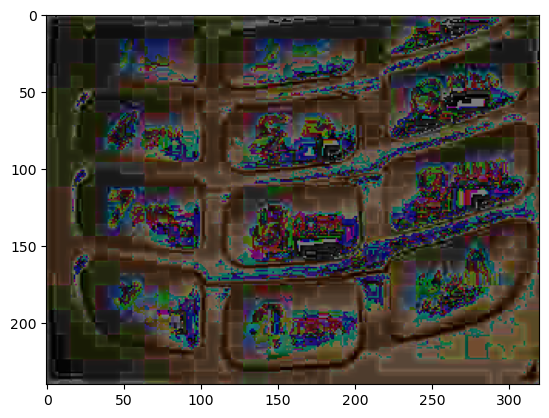

In [10]:
# Normalizing image
img_normalized = cv2.normalize(add_3, None, 0, 0.5, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.imshow(img_normalized)
plt.show()

In [11]:
# Define function to modify gamma

def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

gamma_adj = adjust_gamma(img_normalized, 1.5)
plt.imshow(gamma_adj)
plt.show()

error: OpenCV(4.6.0) /croot/opencv-suite_1676452025216/work/modules/core/src/lut.cpp:366: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == CV_8U || depth == CV_8S) in function 'LUT'
